In [32]:
import os
import math
import random
import warnings
import numpy as np
import pandas as pd 
from sklearn import metrics
from matplotlib import pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

In [33]:
# data_5=pd.read_csv("sim_pw_05.csv")
# data_5=data_5.reset_index(drop=True)
# print(data_5.shape)
## data_5.head()
data_3=pd.read_csv("sim_pw_03_long.csv")
data_3=data_3.dropna().reset_index(drop=True)
print(data_3.shape)
# # data_5.head()
# data_1=pd.read_csv("sim_pw_01.csv")
# data_1=data_1.reset_index(drop=True)
# print(data_1.shape)
# # data_5.head()

(6500, 4)


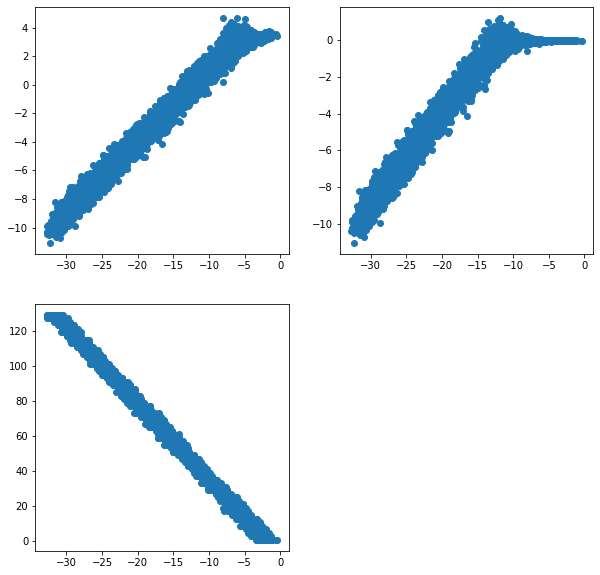

In [37]:
data_3['snr']=np.array([[x]*100 for x in list(range(1,130,2))]).flatten()

# plt.figure(figsize=(10,10))
# plt.subplot(2,2,1)
# plt.scatter(data_3.snr,[math.log(x) for x in data_3['unlist.pxt_dif.']/100])
# plt.subplot(2,2,2)
# plt.scatter(data_3.snr,[math.log(x) for x in data_3['unlist.neh_dif.']/100])
# plt.subplot(2,2,3)
# plt.scatter(data_3.snr,[math.log(x) for x in data_3['unlist.rss.']])

#===================================

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.scatter([math.log(x) for x in data_3['unlist.rss2.']],[math.log(x) for x in data_3['unlist.pxt_dif.']/100])
plt.subplot(2,2,2)
plt.scatter([math.log(x) for x in data_3['unlist.rss2.']],[math.log(x) for x in data_3['unlist.neh_dif.']/100])
plt.subplot(2,2,3)
plt.scatter([math.log(x) for x in data_3['unlist.rss2.']],data_3.snr)


Text(0, 0.5, 'log ($\\dfrac { |{NEH_{computed}} -{ NEH }| } { NEH}$)')

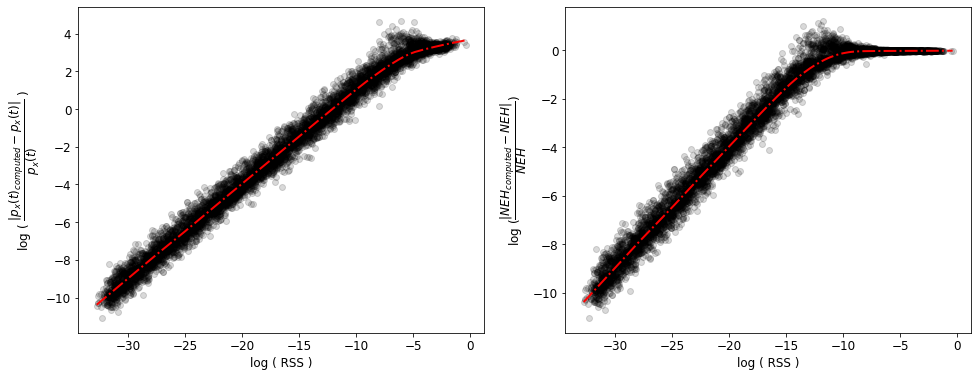

In [74]:

from statsmodels.nonparametric.smoothers_lowess import lowess

plt.figure(figsize=(16,6))
plt.rc('font', size=12)

plt.subplot(1,2,1)
ynew= lowess([math.log(x) for x in data_3['unlist.pxt_dif.']/100],[math.log(x) for x in data_3['unlist.rss2.']],frac=1/5)
plt.scatter([math.log(x) for x in data_3['unlist.rss2.']],[math.log(x) for x in data_3['unlist.pxt_dif.']/100],alpha=0.15,c='k')
plt.plot(ynew[:,0],ynew[:,1],c='r',linewidth=2,alpha=0.99,ls='-.')
plt.xlabel(r'log ( RSS )')
plt.ylabel(r'log ( $\dfrac { | {p_{x}(t)_{computed}} -{ p_{x}(t) } |} { p_{x}(t)}$ )')


plt.subplot(1,2,2)
ynew= lowess([math.log(x) for x in data_3['unlist.neh_dif.']/100],[math.log(x) for x in data_3['unlist.rss2.']],frac=1/5)
plt.scatter([math.log(x) for x in data_3['unlist.rss2.']],[math.log(x) for x in data_3['unlist.neh_dif.']/100],alpha=0.15,c='k')
plt.plot(ynew[:,0],ynew[:,1],c='r',linewidth=2,alpha=0.99,ls='-.')
plt.xlabel(r'log ( RSS )')
plt.ylabel(r'log ($\dfrac { |{NEH_{computed}} -{ NEH }| } { NEH}$)')

Text(0.5, 0, 'Signal to noise ratio (db)')

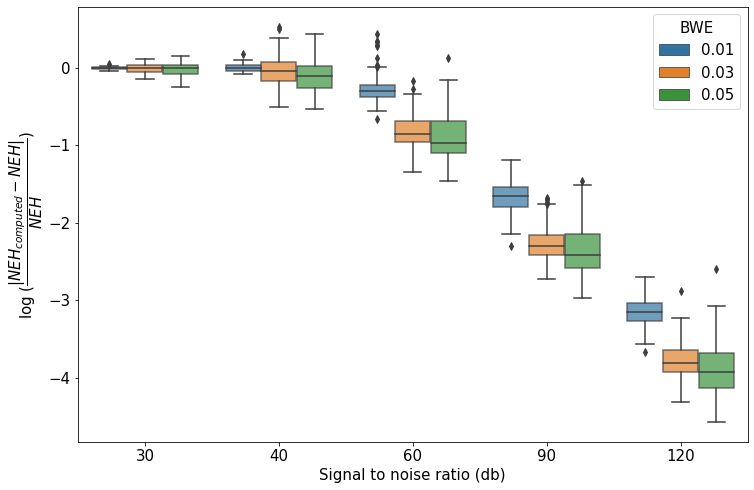

In [11]:
def prepre_data(data,pw):
    res=pd.DataFrame()
    snr=[120,90,60,40,30]#,10
    for i in range(len(snr)):
        temp=pd.DataFrame()
        temp['Error']=[math.log(x/100,10) for x in data.iloc[i*100:100+i*100,0]]
        temp['snr']=[snr[i]]*100
        temp['BWE']=pw
        res=pd.concat([res,temp])
    return res

plt.figure(figsize=(12,8))
plt.rc('font', size=15) 
res=pd.concat([prepre_data(data_1,'0.01'),prepre_data(data_3,'0.03'),prepre_data(data_5,'0.05')]) 
sns.boxplot(data=res,x='snr',y='Error',hue='BWE',boxprops={'alpha': 0.7})

plt.ylabel(r'log ($\dfrac { |{NEH_{computed}} -{ NEH }| } { NEH}$)')
plt.xlabel('Signal to noise ratio (db)')

# plt.savefig("snr_NEH.jpeg",dpi=900,bbox_inches='tight')

In [12]:
# def prepre_data(data,pw):
#     res=pd.DataFrame()
#     snr=[120,90,60,40,30]#,10
#     for i in range(len(snr)):
#         temp=pd.DataFrame()
#         temp['Error']=[math.log(x/100,10) for x in data.iloc[i*100:100+i*100,0]]
#         temp['snr']=[snr[i]]*100
#         temp['BWE']=pw
#         res=pd.concat([res,temp])
#     return res

# plt.figure(figsize=(12,8))
# plt.rc('font', size=15) 
# res=pd.concat([prepre_data(data_1,'0.01'),prepre_data(data_3,'0.03'),prepre_data(data_5,'0.05')]) 
# sns.boxplot(data=res,x='snr',y='Error',hue='BWE',boxprops={'alpha': 0.7})

# plt.ylabel(r'log ($\dfrac { |{NEH_{computed}} -{ NEH }| } { NEH}$)')
# plt.xlabel('Signal to noise ratio (db)')

# # plt.savefig("snr_NEH.jpeg",dpi=900,bbox_inches='tight')

Text(0.5, 0, 'Signal to noise ratio (db)')

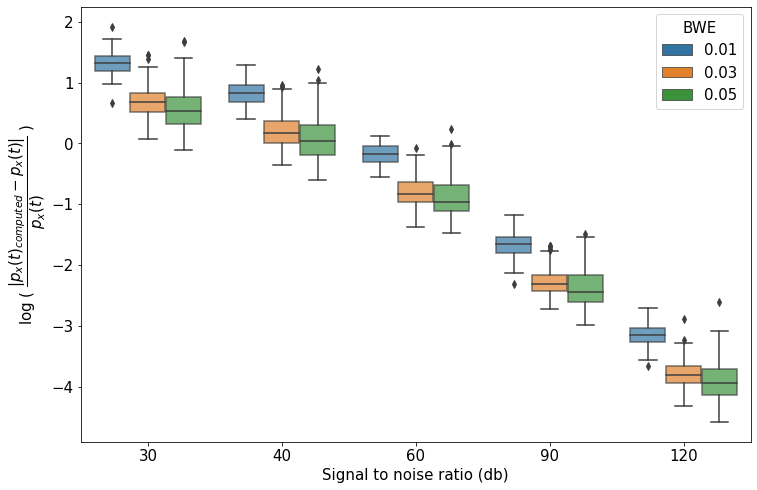

In [13]:
# sns.boxplot(data=prepre_data(data_1,'1'),x='snr',y='Error',boxprops={'alpha': 0.7},hue='pw')

def prepre_data(data,pw):
    res=pd.DataFrame()
    snr=[120,90,60,40,30]#,10
    for i in range(len(snr)):
        temp=pd.DataFrame()
        temp['Error']=[math.log(x/100,10) for x in data.iloc[i*100:100+i*100,1]]
        temp['snr']=[snr[i]]*100
        temp['BWE']=pw
        res=pd.concat([res,temp])
    return res

plt.figure(figsize=(12,8))
plt.rc('font', size=15) 
res=pd.concat([prepre_data(data_1,'0.01'),prepre_data(data_3,'0.03'),prepre_data(data_5,'0.05')])
sns.boxplot(data=res,x='snr',y='Error',hue='BWE',boxprops={'alpha': 0.7})
# plt.ylim([0,3])
plt.ylabel(r'log ( $\dfrac { | {p_{x}(t)_{computed}} -{ p_{x}(t) } |} { p_{x}(t)}$ )')
plt.xlabel('Signal to noise ratio (db)')
# plt.savefig("snr_pxt.jpeg",dpi=900,bbox_inches='tight')

In [14]:
# def prepre_data(data,pw):
#     res=pd.DataFrame()
#     snr=[120,90,60,40,30]#,10
#     for i in range(len(snr)):
#         temp=pd.DataFrame()
#         temp['Error']=[math.log(x/100,10) for x in data.iloc[i*100:100+i*100,1]]
#         temp['snr']=[snr[i]]*100
#         temp['BWE']=pw
#         res=pd.concat([res,temp])
#     return res

# plt.figure(figsize=(12,8))
# plt.rc('font', size=15) 
# res=pd.concat([prepre_data(data_1,'0.01'),prepre_data(data_3,'0.03'),prepre_data(data_5,'0.05')])
# sns.boxplot(data=res,x='snr',y='Error',hue='BWE',boxprops={'alpha': 0.7})
# # plt.ylim([0,3])
# plt.ylabel(r'log ( $\dfrac { | {p_{x}(t)_{computed}} -{ p_{x}(t) } |} { p_{x}(t)}$ )')
# plt.xlabel('Signal to noise ratio (db)')
# plt.savefig("snr_pxt.jpeg",dpi=900,bbox_inches='tight')

In [15]:
# sns.boxplot(data=prepre_data(data_1,'1'),x='snr',y='Error',boxprops={'alpha': 0.7},hue='pw')

Text(0.5, 0, 'Signal to noise ratio (db)')

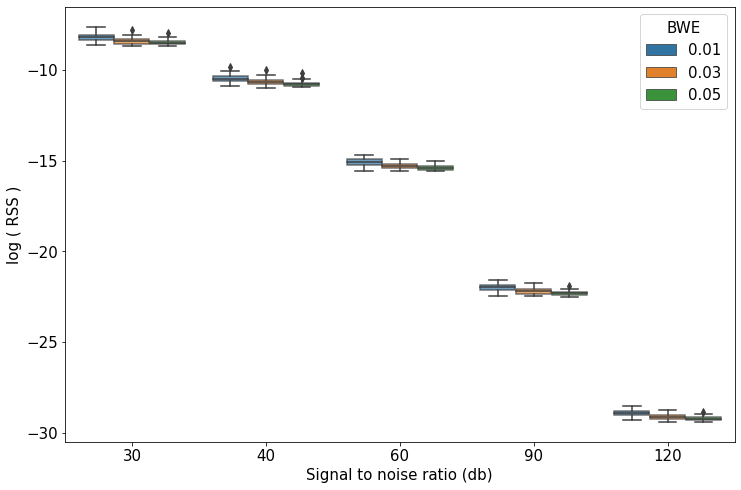

In [16]:
# sns.boxplot(data=prepre_data(data_1,'1'),x='snr',y='Error',boxprops={'alpha': 0.7},hue='pw')

def prepre_data(data,pw):
    res=pd.DataFrame()
    snr=[120,90,60,40,30]#,10
    for i in range(len(snr)):
        temp=pd.DataFrame()
        temp['Error']=[math.log(x) for x in data.iloc[i*100:100+i*100,2]]
        temp['snr']=[snr[i]]*100
        temp['BWE']=pw
        res=pd.concat([res,temp])
    return res

plt.figure(figsize=(12,8))
plt.rc('font', size=15) 
res=pd.concat([prepre_data(data_1,'0.01'),prepre_data(data_3,'0.03'),prepre_data(data_5,'0.05')])
sns.boxplot(data=res,x='snr',y='Error',hue='BWE',boxprops={'alpha': 0.7})
# plt.ylim([0,3])
plt.ylabel(r'log ( RSS )')
plt.xlabel('Signal to noise ratio (db)')
# plt.savefig("snr_pxt.jpeg",dpi=900,bbox_inches='tight')

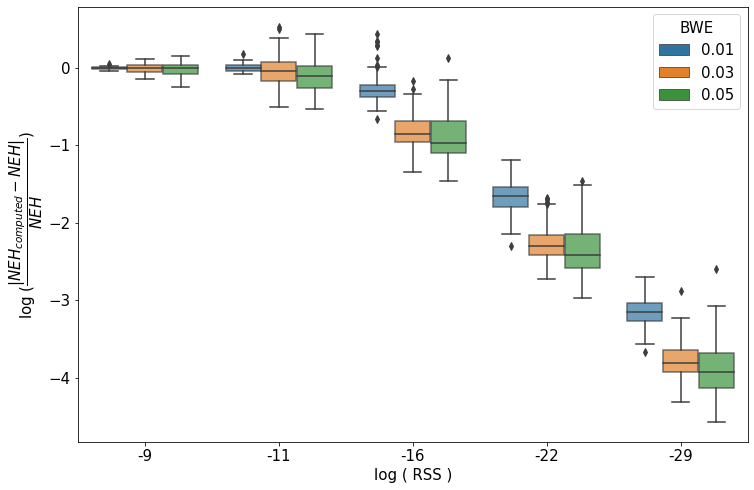

[Text(0, 0, '-9'),
 Text(1, 0, '-11'),
 Text(2, 0, '-16'),
 Text(3, 0, '-22'),
 Text(4, 0, '-29')]

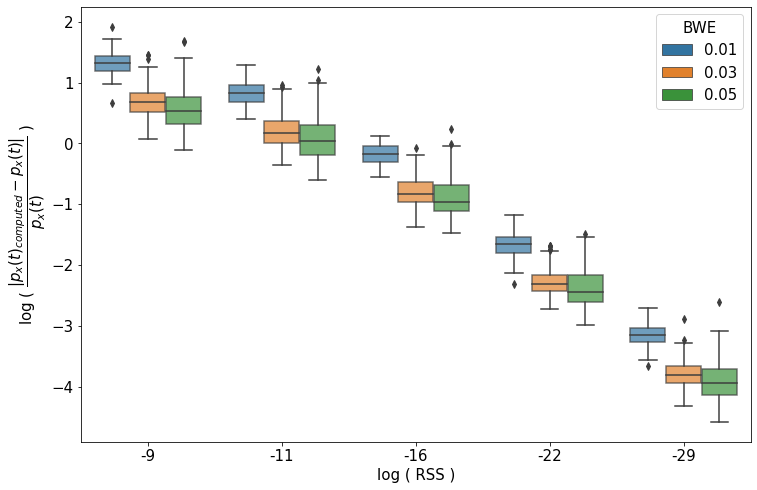

In [20]:
# sns.boxplot(data=prepre_data(data_1,'1'),x='snr',y='Error',boxprops={'alpha': 0.7},hue='pw')

def prepre_data(data,pw):
    res=pd.DataFrame()
    snr=[120,90,60,40,30]#,10
    for i in range(len(snr)):
        temp=pd.DataFrame()
        temp['rss_Error']=[math.log(x) for x in data.iloc[i*100:100+i*100,2]]        
        temp['pxt_Error']=[math.log(x/100,10) for x in data.iloc[i*100:100+i*100,1]]
        temp['neh_Error']=[math.log(x/100,10) for x in data.iloc[i*100:100+i*100,0]]
        temp['snr']=[snr[i]]*100
        temp['BWE']=pw
        res=pd.concat([res,temp])
    return res

res=pd.concat([prepre_data(data_1,'0.01'),prepre_data(data_3,'0.03'),prepre_data(data_5,'0.05')])
res=res.dropna()

plt.figure(figsize=(12,8))
plt.rc('font', size=15) 
g=sns.boxplot(data=res,x='snr',y='neh_Error',hue='BWE',boxprops={'alpha': 0.7})
# plt.ylim([0,3])
plt.xlabel(r'log ( RSS )')
plt.ylabel(r'log ($\dfrac { |{NEH_{computed}} -{ NEH }| } { NEH}$)')
g.set_xticklabels([math.floor(x) for x  in [np.median(res[ (res.snr.astype('float')==120) & (res.BWE.astype('float')==0.01)].rss_Error.astype('float')),
       np.median(res[ (res.snr.astype('float')==90) & (res.BWE.astype('float')==0.01)].rss_Error.astype('float')),
       np.median(res[ (res.snr.astype('float')==60) & (res.BWE.astype('float')==0.01)].rss_Error.astype('float')),
       np.median(res[ (res.snr.astype('float')==40) & (res.BWE.astype('float')==0.01)].rss_Error.astype('float')),
       np.median(res[ (res.snr.astype('float')==30) & (res.BWE.astype('float')==0.01)].rss_Error.astype('float')),
#        np.median(res[ (res.snr.astype('float')==10) & (res.BWE.astype('float')==0.01)].rss_Error.astype('float'))
                                  ]][::-1])

plt.show()


plt.figure(figsize=(12,8))
plt.rc('font', size=15) 
g=sns.boxplot(data=res,x='snr',y='pxt_Error',hue='BWE',boxprops={'alpha': 0.7})
# plt.ylim([0,3])
plt.xlabel(r'log ( RSS )')
plt.ylabel(r'log ( $\dfrac { | {p_{x}(t)_{computed}} -{ p_{x}(t) } |} { p_{x}(t)}$ )')
g.set_xticklabels([math.floor(x) for x  in [np.median(res[ (res.snr.astype('float')==120) & (res.BWE.astype('float')==0.01)].rss_Error.astype('float')),
       np.median(res[ (res.snr.astype('float')==90) & (res.BWE.astype('float')==0.01)].rss_Error.astype('float')),
       np.median(res[ (res.snr.astype('float')==60) & (res.BWE.astype('float')==0.01)].rss_Error.astype('float')),
       np.median(res[ (res.snr.astype('float')==40) & (res.BWE.astype('float')==0.01)].rss_Error.astype('float')),
       np.median(res[ (res.snr.astype('float')==30) & (res.BWE.astype('float')==0.01)].rss_Error.astype('float')),
#        np.median(res[ (res.snr.astype('float')==10) & (res.BWE.astype('float')==0.01)].rss_Error.astype('float'))
                                           ]][::-1])




In [41]:
# [120,90,60,40,30,10][::-1]

In [37]:
# res=pd.concat([prepre_data(data_1,'0.01'),prepre_data(data_3,'0.03'),prepre_data(data_5,'0.05')])
# res=res[res.BWE.astype('float')==0.01]

# print()

# plt.scatter(res.rss_Error,res.neh_Error)
# plt.xlabel('log(RSS)')
# plt.ylabel("neh error")
# plt.show()

# plt.scatter(res.rss_Error,res.pxt_Error)
# plt.xlabel('log(RSS)')
# plt.ylabel("pxt error")